<a href="https://colab.research.google.com/github/Neerajmn28/CognoRise-Infotech/blob/main/Covid19%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Problem Statement: Classification of Chest X-ray Images for COVID-19, Pneumonia, and Normal Conditions Using Convolutional Neural Networks (CNNs)
Objective:
Develop a Convolutional Neural Network (CNN) model to classify chest X-ray images into three categories: COVID-19 positive cases, pneumonia, and normal (healthy) conditions.

Background:
The COVID-19 pandemic has underscored the importance of rapid and accurate diagnosis of respiratory conditions. Chest X-rays are a common and accessible imaging modality used in the diagnosis of various lung conditions, including COVID-19 and pneumonia. Automating the classification of these images using deep learning can assist healthcare professionals by providing quick and reliable diagnostic support.



In [ ]:
import os
import numpy as np
import pandas as pd
from google.colab import files
import random
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mping
import pathlib
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!kaggle datasets download -d sid321axn/covid-cxr-image-dataset-research

Dataset URL: https://www.kaggle.com/datasets/sid321axn/covid-cxr-image-dataset-research
License(s): CC0-1.0
100% 571M/572M [00:08<00:00, 71.0MB/s]
100% 572M/572M [00:08<00:00, 68.2MB/s]


In [ ]:
!unzip /content/covid-cxr-image-dataset-research.zip

Archive:  /content/covid-cxr-image-dataset-research.zip
  inflating: COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: COVID_IEEE/covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: COVID_IEEE/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-001.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-002.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-

In [ ]:
data_dir = pathlib.Path('/content/COVID_IEEE')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['covid' 'normal' 'virus']


In [ ]:
for dirpath,dirnames, filenames in os.walk('/content/COVID_IEEE'):
  print(f'There are {len(dirnames)} directories and {len(filenames)}  images in {dirpath}')

There are 3 directories and 0  images in /content/COVID_IEEE
There are 0 directories and 668  images in /content/COVID_IEEE/normal
There are 0 directories and 536  images in /content/COVID_IEEE/covid
There are 0 directories and 619  images in /content/COVID_IEEE/virus


In [ ]:
data = []
labels = []
covid = os.listdir('/content/COVID_IEEE/covid')
for item in covid:

  image = cv2.imread('/content/COVID_IEEE/covid'+'/'+item,)
  image = cv2.resize(image, (224,224))
  data.append(image)
  labels.append(0)

In [ ]:
normal = os.listdir('/content/COVID_IEEE/normal')
for item in normal:
  image = cv2.imread('/content/COVID_IEEE/normal'+'/'+item,)
  image = cv2.resize(image, (224,224))
  data.append(image)
  labels.append(1)

In [ ]:
pneumonia = os.listdir('/content/COVID_IEEE/virus')
for item in pneumonia:
  image = cv2.imread('/content/COVID_IEEE/virus'+'/'+item,)
  image = cv2.resize(image, (224,224))
  data.append(image)
  labels.append(2)

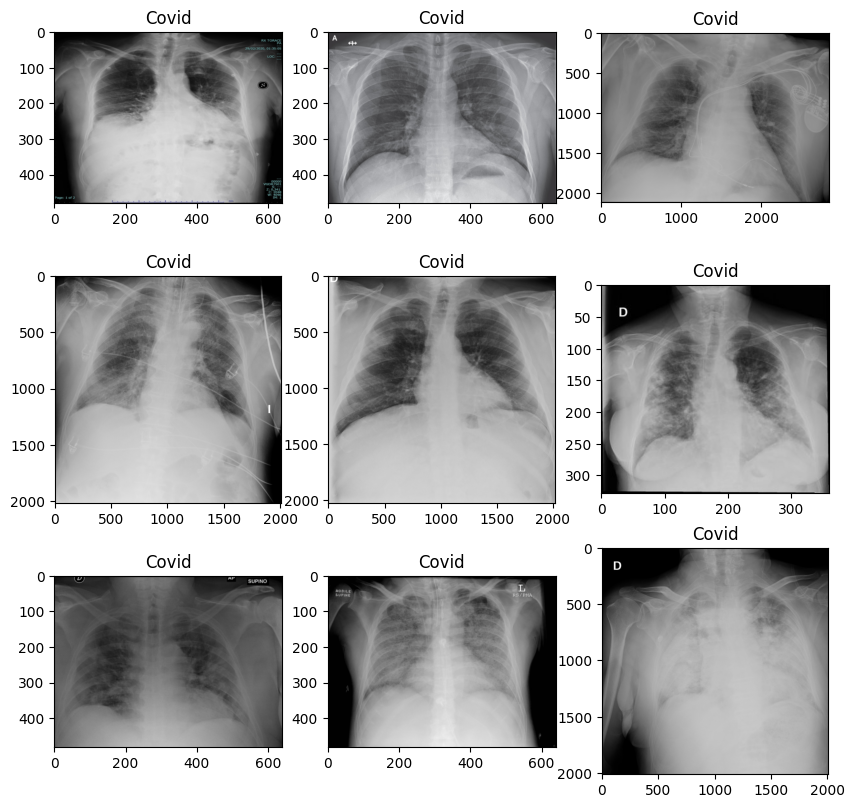

In [ ]:
plt.figure(figsize=(10,10))
for item in range(9):
  plt.subplot(3,3, item + 1)
  plt.imshow(plt.imread(os.path.join('/content/COVID_IEEE/covid',covid[item])))
  plt.title('Covid')
plt.show()

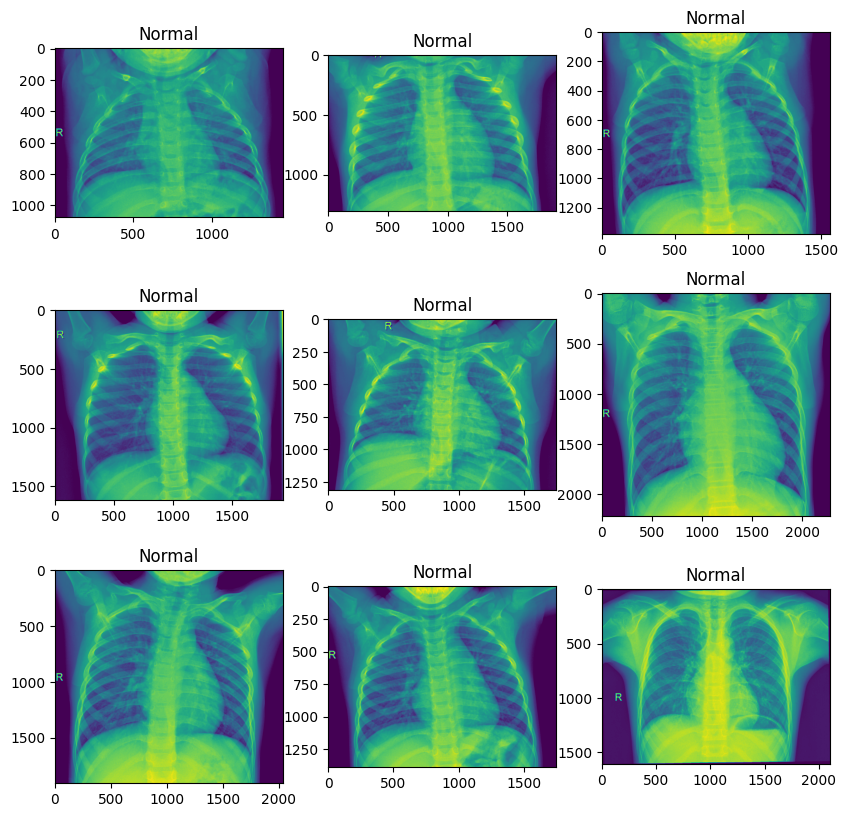

In [ ]:
plt.figure(figsize=(10,10))
for item in range(9):
  plt.subplot(3,3, item + 1)
  plt.imshow(plt.imread(os.path.join('/content/COVID_IEEE/normal',normal[item])))
  plt.title('Normal')
plt.show()

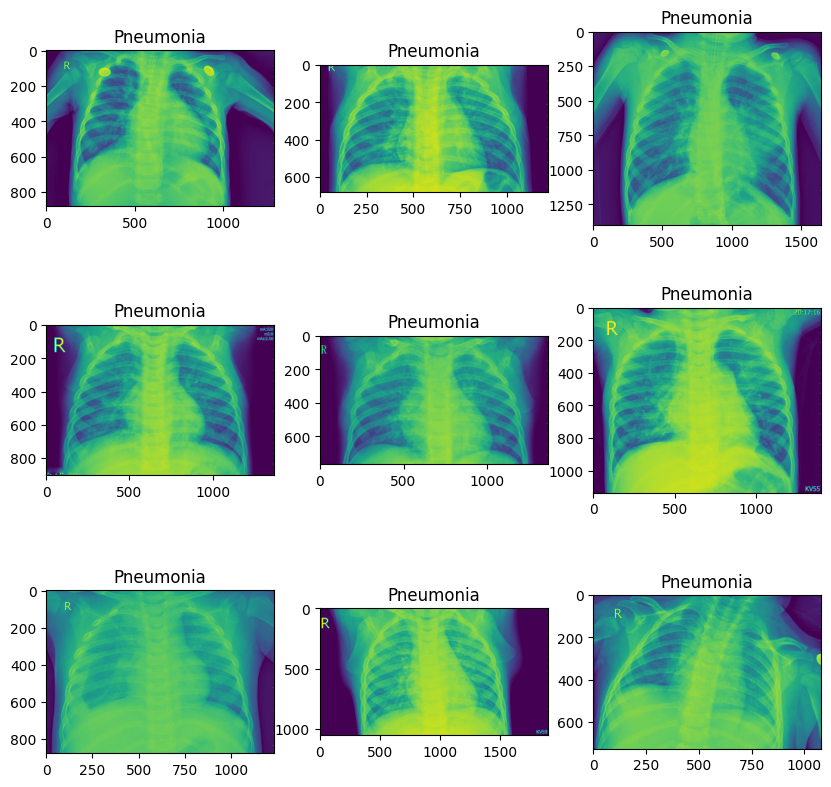

In [ ]:
plt.figure(figsize=(10,10))
for item in range(9):
  plt.subplot(3,3, item + 1)
  plt.imshow(plt.imread(os.path.join('/content/COVID_IEEE/virus',pneumonia[item])))
  plt.title('Pneumonia')
plt.show()

In [ ]:
data = np.array(data) / 255.0
img_labels = np.array(labels)

In [ ]:
img_labels

array([0, 0, 0, ..., 2, 2, 2])

Model Building using CNN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, img_labels, test_size = 0.20, random_state = 42)
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 3)

In [ ]:
model = Sequential()
# Block Number 1
model.add(Conv2D(input_shape = (224,224,3), filters = 32, padding = 'same', kernel_size = (3,3)))
model.add(Activation('relu'))

model.add(Conv2D(filters = 32, padding = 'same', kernel_size = (3,3)))
model.add(Activation('relu'))

model.add(MaxPool2D((2,2)))

# Block Number 2
model.add(Conv2D(filters = 64, padding = 'same', kernel_size = (3,3)))
model.add(Activation('relu'))

model.add(Conv2D(filters = 64, padding = 'same', kernel_size = (3,3)))
model.add(Activation('relu'))

model.add(MaxPool2D((2,2)))

# Block Number 3
model.add(Conv2D(filters = 128, padding = 'same', kernel_size = (3,3)))
model.add(Activation('relu'))

model.add(Conv2D(filters = 128, padding = 'same', kernel_size = (3,3)))
model.add(Activation('relu'))

model.add(MaxPool2D((2,2)))
model.add(MaxPool2D((2,2)))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(units = 1024, activation = 'relu'))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 3, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                        

In [ ]:
model.fit(X_train, y_train, validation_split = 0.3, epochs = 15, batch_size = 32)

Epoch 1/15
32/32 [==============================] - 453s 14s/step - loss: 0.8888 - accuracy: 0.5451 - val_loss: 0.5412 - val_accuracy: 0.7763
Epoch 2/15
32/32 [==============================] - 449s 14s/step - loss: 0.5217 - accuracy: 0.7765 - val_loss: 0.4302 - val_accuracy: 0.8128
Epoch 3/15
32/32 [==============================] - 413s 13s/step - loss: 0.3625 - accuracy: 0.8637 - val_loss: 0.2855 - val_accuracy: 0.8973
Epoch 4/15
32/32 [==============================] - 460s 15s/step - loss: 0.2484 - accuracy: 0.9059 - val_loss: 0.2375 - val_accuracy: 0.9064
Epoch 5/15
32/32 [==============================] - 448s 14s/step - loss: 0.1660 - accuracy: 0.9431 - val_loss: 0.1909 - val_accuracy: 0.9384
Epoch 6/15
32/32 [==============================] - 445s 14s/step - loss: 0.1321 - accuracy: 0.9510 - val_loss: 0.1714 - val_accuracy: 0.9429
Epoch 7/15
32/32 [==============================] - 403s 13s/step - loss: 0.1222 - accuracy: 0.9569 - val_loss: 0.2105 - val_accuracy: 0.9201
Epoch 

Text(0.5, 1.0, 'Training Validation Accuracy')

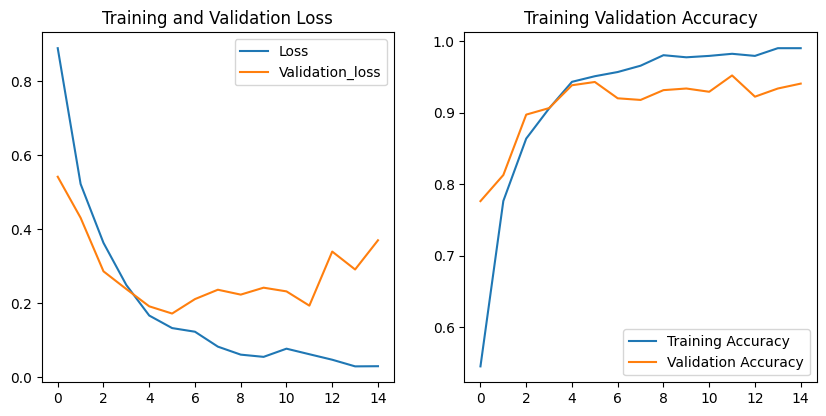

In [ ]:
# Saving the model history
loss = pd.DataFrame(model.history.history)

# plotting the loss and accuracy
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss['loss'], label = 'Loss')
plt.plot(loss['val_loss'], label = 'Validation_loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(2,2,2)
plt.plot(loss['accuracy'], label = 'Training Accuracy')
plt.plot(loss['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.title('Training Validation Accuracy')

In [ ]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

12/12 [==============================] - 42s 3s/step


In [ ]:
print(classification_report(y_test_new,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       108
           1       0.88      0.98      0.92       129
           2       0.98      0.90      0.94       128

    accuracy                           0.94       365
   macro avg       0.94      0.94      0.94       365
weighted avg       0.94      0.94      0.94       365



In [ ]:
pd.DataFrame(confusion_matrix(y_test_new,y_pred), columns = ['covid','normal','pneumonia'], index = ['covid','normal','pneumonia'])

,covid,normal,pneumonia
covid,101,6,1
normal,2,126,1
pneumonia,1,12,115


Pre-trained Model Using Transfer Learning

In [ ]:
base_model = tf.keras.applications.MobileNet(input_shape = [224,224,3], weights = 'imagenet', include_top = False)

for layer in base_model.layers:
  layer.trainable = False

In [ ]:
model = Flatten()(base_model.output)

model = Dense(units = 1024, activation = 'relu')(model)
model = Dense(units = 512, activation = 'relu')(model)
model = Dense(units = 256, activation = 'relu')(model)

prediction_layer = Dense(units = 3, activation = 'softmax')(model)

In [ ]:
model = Model(inputs = base_model.input, outputs = prediction_layer)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [ ]:
model.fit(X_train, y_train, validation_split = 0.3, epochs = 15, batch_size = 32)

Epoch 1/15
32/32 [==============================] - 121s 4s/step - loss: 11.2439 - accuracy: 0.7451 - val_loss: 1.2200 - val_accuracy: 0.9292
Epoch 2/15
32/32 [==============================] - 115s 4s/step - loss: 0.7138 - accuracy: 0.9382 - val_loss: 0.3377 - val_accuracy: 0.9635
Epoch 3/15
32/32 [==============================] - 99s 3s/step - loss: 0.1527 - accuracy: 0.9784 - val_loss: 0.3011 - val_accuracy: 0.9589
Epoch 4/15
32/32 [==============================] - 99s 3s/step - loss: 0.0501 - accuracy: 0.9892 - val_loss: 0.2103 - val_accuracy: 0.9703
Epoch 5/15
32/32 [==============================] - 116s 4s/step - loss: 0.0432 - accuracy: 0.9902 - val_loss: 0.3155 - val_accuracy: 0.9635
Epoch 6/15
32/32 [==============================] - 126s 4s/step - loss: 0.0124 - accuracy: 0.9971 - val_loss: 0.3632 - val_accuracy: 0.9635
Epoch 7/15
32/32 [==============================] - 97s 3s/step - loss: 0.0213 - accuracy: 0.9990 - val_loss: 0.2748 - val_accuracy: 0.9680
Epoch 8/15
32/3

Text(0.5, 1.0, 'Training-Validation Accuracy')

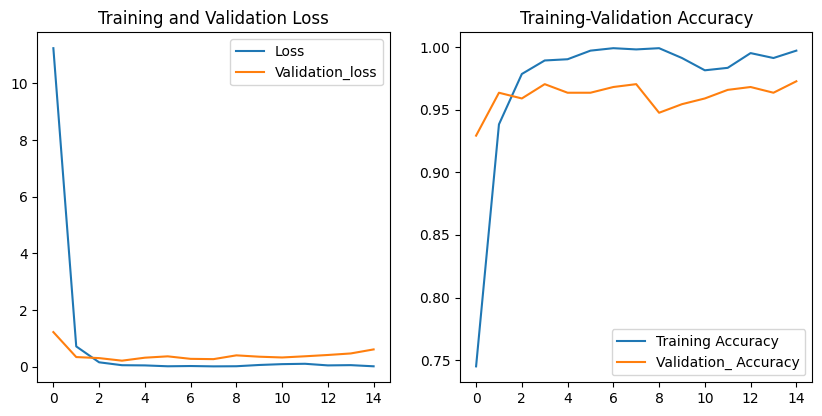

In [ ]:
#saving the model history
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss['loss'], label ='Loss')
plt.plot(loss['val_loss'], label = 'Validation_loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = 'Training Accuracy')
plt.plot(loss['val_accuracy'], label = 'Validation_ Accuracy')
plt.legend()
plt.title('Training-Validation Accuracy')

In [ ]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

12/12 [==============================] - 16s 1s/step


In [ ]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       108
           1       0.96      0.95      0.96       129
           2       0.98      0.96      0.97       128

    accuracy                           0.97       365
   macro avg       0.97      0.97      0.97       365
weighted avg       0.97      0.97      0.97       365



In [ ]:
 pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ['covid', 'normal', 'virus'], index = ['covid', 'normal', 'virus'])

,covid,normal,virus
covid,108,0,0
normal,3,123,3
virus,0,5,123
